## Thank you Jesus

In [ ]:
#importing all necessary datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
import xgboost as xgb

In [2]:
#importing the data and submission template
train = pd.read_csv('StudentPerformanceTrainingSet.csv')
test = pd.read_csv('StudentPerformanceTestSet.csv')
submission = pd.read_csv('Solution File.csv')

In [2]:
#importing the data and submission template
train = pd.read_csv('StudentPerformanceTrainingSet.csv')
test = pd.read_csv('StudentPerformanceTestSet.csv')
submission = pd.read_csv('Solution File.csv')

In [3]:
train['lunch_freq'] = train['lunch'].map(train['lunch'].value_counts().to_dict())/len(train)

In [4]:
train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification,lunch_freq
0,1014,female,group D,high school,standard,completed,88,employed,poor,0.5725
1,1650,female,NaN,some high school,free/reduced,completed,34,unemployed,middle class,0.2925
2,717,female,group C,some high school,standard,none,59,employed,middle class,0.5725
3,258,female,group D,NaN,standard,none,68,employed,poor,0.5725
4,1312,male,group D,some college,standard,completed,74,employed,poor,0.5725


In [3]:
print(train.shape)
print(test.shape)

(1200, 9)
(800, 8)


In [4]:
train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification
0,1014,female,group D,high school,standard,completed,88,employed,poor
1,1650,female,NaN,some high school,free/reduced,completed,34,unemployed,middle class
2,717,female,group C,some high school,standard,none,59,employed,middle class
3,258,female,group D,NaN,standard,none,68,employed,poor
4,1312,male,group D,some college,standard,completed,74,employed,poor


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
student_id                        1200 non-null int64
gender                            1161 non-null object
race/ethnicity                    1117 non-null object
parental level of education       1050 non-null object
lunch                             1038 non-null object
test preparation course           1147 non-null object
score                             1200 non-null int64
parental_job_status               1178 non-null object
parental_wealth_classification    1159 non-null object
dtypes: int64(2), object(7)
memory usage: 84.4+ KB


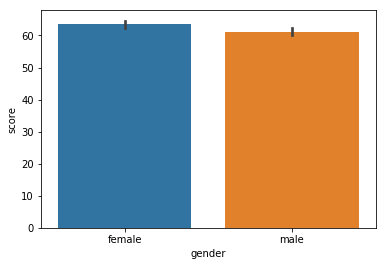

In [9]:
sns.barplot(x= 'gender',y='score',data= train)

# Feature Engineering

In [6]:
train.isnull().sum()

student_id                          0
gender                             39
race/ethnicity                     83
parental level of education       150
lunch                             162
test preparation course            53
score                               0
parental_job_status                22
parental_wealth_classification     41
dtype: int64

In [7]:
test.isnull().sum()

student_id                          0
gender                             35
race/ethnicity                     76
parental level of education       109
lunch                             104
test preparation course            40
parental_job_status                24
parental_wealth_classification     34
dtype: int64

In [11]:
#Handling missing data
to_fill  = ['gender','race/ethnicity','parental level of education','lunch','test preparation course',
            'parental_job_status','parental_wealth_classification']
for i in to_fill:
    train[i].fillna(train[i].mode()[0], inplace = True)
    test[i].fillna(test[i].mode()[0], inplace = True)

In [12]:
train.isnull().sum()

student_id                        0
gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
score                             0
parental_job_status               0
parental_wealth_classification    0
dtype: int64

In [13]:
#Encoding categorical features
one_hot_cols = ['gender','race/ethnicity','test preparation course',
                'parental_wealth_classification','parental level of education','lunch','parental_job_status']
#decided to use one hot encoding since all elements in features are of equal importance

In [14]:
train = pd.get_dummies(train,columns=one_hot_cols)
test = pd.get_dummies(test,columns=one_hot_cols)

In [15]:
train.head()

,student_id,score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,parental_job_status_employed,parental_job_status_unemployed
0,1014,88,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
1,1650,34,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,717,59,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,258,68,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,1312,74,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0


In [16]:
# drop student_id it not needed
train.drop('student_id',axis = 1, inplace = True)
test.drop('student_id', axis = 1,inplace = True)

In [17]:
train.head()

,score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,test preparation course_none,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,parental_job_status_employed,parental_job_status_unemployed
0,88,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,34,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,59,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
3,68,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,74,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0


In [17]:
test.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,test preparation course_none,parental_wealth_classification_middle class,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,parental_job_status_employed,parental_job_status_unemployed
0,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


# Modelling

In [19]:
y = train['score']
X = train.drop('score',axis = 1)

In [20]:
#splitting data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=43)

## 1. Linear model

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)
model_1 = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,model)))
print(np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
lr.score(X_test,y_test)#6.30,6.75
lr_pred =  lr.predict(test)

6.293976793745615
6.757994036579013


## 2. Xgboost

In [34]:
xgbreg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.044, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10,random_state = 43,min_child_wweight = 12)

xgbreg.fit(X_train,y_train)
model_2 = xgbreg.predict(X_test)
xgb_pred =  xgbreg.predict(test)
print(np.sqrt(mean_squared_error(model_1,y_test)))
print(np.sqrt(mean_squared_error(y_train, xgbreg.predict(X_train))))#6.72/5.62

6.293976793745615
5.604698325849212


## 3.RandomForest

In [159]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=5000,random_state =42)
rfr.fit(X_train,y_train)
model_3 = rfr.predict(X_test)
rfr_pred = rfr.predict(test)
print(np.sqrt(mean_squared_error(model_2,y_test)))
print(np.sqrt(mean_squared_error(y_train, xgbreg.predict(X_train))))#7.1/5.62

6.737002942161173
5.604698325849212


## 4. Bagging Reg

In [91]:
from sklearn import model_selection
from  sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
bagregr = BaggingRegressor(base_estimator=lr,n_estimators=43, random_state=43).fit(X_train, y_train)
model_4 = bagregr.predict(X_test)
bagregr_pred = bagregr.predict(test)
print(np.sqrt(mean_squared_error(model_3,y_test)))
print(np.sqrt(mean_squared_error(y_train, bagregr.predict(X_train))))#6.61/5.76

7.107489273907956
6.758374878962898


## 5. Catboost

In [37]:
import catboost as cbt
cbt = cbt.CatBoostRegressor(random_state=34)
cbt.fit(X_train,y_train)
model_5 = cbt.predict(X_test)


Learning rate set to 0.038748
0:	learn: 13.9552137	total: 3.63ms	remaining: 3.62s
1:	learn: 13.5640862	total: 5.79ms	remaining: 2.89s
2:	learn: 13.2226734	total: 8.81ms	remaining: 2.93s
3:	learn: 12.8655256	total: 10.9ms	remaining: 2.72s
4:	learn: 12.5213454	total: 12.5ms	remaining: 2.48s
5:	learn: 12.2063348	total: 15.4ms	remaining: 2.56s
6:	learn: 11.9040165	total: 18.5ms	remaining: 2.62s
7:	learn: 11.6200011	total: 21.5ms	remaining: 2.66s
8:	learn: 11.3376759	total: 24.5ms	remaining: 2.69s
9:	learn: 11.0821097	total: 27.9ms	remaining: 2.77s
10:	learn: 10.8455145	total: 31.4ms	remaining: 2.82s
11:	learn: 10.6066826	total: 33.2ms	remaining: 2.73s
12:	learn: 10.3785824	total: 34.4ms	remaining: 2.61s
13:	learn: 10.1716122	total: 37.4ms	remaining: 2.64s
14:	learn: 9.9633616	total: 40.9ms	remaining: 2.69s
15:	learn: 9.7835094	total: 44.3ms	remaining: 2.73s
16:	learn: 9.6062051	total: 47.5ms	remaining: 2.74s
17:	learn: 9.4342971	total: 50.5ms	remaining: 2.76s
18:	learn: 9.2667377	total: 53

176:	learn: 6.2149726	total: 536ms	remaining: 2.49s
177:	learn: 6.2103397	total: 540ms	remaining: 2.49s
178:	learn: 6.2069323	total: 543ms	remaining: 2.49s
179:	learn: 6.2035183	total: 545ms	remaining: 2.48s
180:	learn: 6.2011247	total: 548ms	remaining: 2.48s
181:	learn: 6.1985733	total: 551ms	remaining: 2.48s
182:	learn: 6.1981413	total: 553ms	remaining: 2.47s
183:	learn: 6.1955687	total: 556ms	remaining: 2.46s
184:	learn: 6.1909030	total: 559ms	remaining: 2.46s
185:	learn: 6.1870601	total: 570ms	remaining: 2.49s
186:	learn: 6.1843047	total: 573ms	remaining: 2.49s
187:	learn: 6.1815317	total: 576ms	remaining: 2.49s
188:	learn: 6.1786786	total: 579ms	remaining: 2.48s
189:	learn: 6.1739645	total: 583ms	remaining: 2.48s
190:	learn: 6.1716050	total: 586ms	remaining: 2.48s
191:	learn: 6.1673404	total: 593ms	remaining: 2.49s
192:	learn: 6.1643914	total: 596ms	remaining: 2.49s
193:	learn: 6.1603582	total: 599ms	remaining: 2.49s
194:	learn: 6.1572919	total: 602ms	remaining: 2.49s
195:	learn: 

377:	learn: 5.8112871	total: 1.08s	remaining: 1.78s
378:	learn: 5.8108543	total: 1.09s	remaining: 1.78s
379:	learn: 5.8097349	total: 1.09s	remaining: 1.78s
380:	learn: 5.8086948	total: 1.09s	remaining: 1.77s
381:	learn: 5.8069878	total: 1.09s	remaining: 1.77s
382:	learn: 5.8063081	total: 1.1s	remaining: 1.77s
383:	learn: 5.8051310	total: 1.1s	remaining: 1.76s
384:	learn: 5.8037173	total: 1.1s	remaining: 1.76s
385:	learn: 5.8023734	total: 1.1s	remaining: 1.76s
386:	learn: 5.8014239	total: 1.11s	remaining: 1.75s
387:	learn: 5.8003608	total: 1.11s	remaining: 1.75s
388:	learn: 5.7985215	total: 1.11s	remaining: 1.75s
389:	learn: 5.7976749	total: 1.12s	remaining: 1.75s
390:	learn: 5.7969227	total: 1.12s	remaining: 1.75s
391:	learn: 5.7952854	total: 1.13s	remaining: 1.75s
392:	learn: 5.7942717	total: 1.13s	remaining: 1.74s
393:	learn: 5.7930447	total: 1.13s	remaining: 1.74s
394:	learn: 5.7913184	total: 1.13s	remaining: 1.74s
395:	learn: 5.7905224	total: 1.14s	remaining: 1.73s
396:	learn: 5.78

541:	learn: 5.6542421	total: 1.48s	remaining: 1.25s
542:	learn: 5.6539174	total: 1.48s	remaining: 1.25s
543:	learn: 5.6533011	total: 1.48s	remaining: 1.24s
544:	learn: 5.6526513	total: 1.49s	remaining: 1.24s
545:	learn: 5.6522105	total: 1.49s	remaining: 1.24s
546:	learn: 5.6516972	total: 1.49s	remaining: 1.23s
547:	learn: 5.6512504	total: 1.49s	remaining: 1.23s
548:	learn: 5.6502545	total: 1.5s	remaining: 1.23s
549:	learn: 5.6489964	total: 1.5s	remaining: 1.23s
550:	learn: 5.6484496	total: 1.5s	remaining: 1.22s
551:	learn: 5.6478142	total: 1.5s	remaining: 1.22s
552:	learn: 5.6465082	total: 1.5s	remaining: 1.22s
553:	learn: 5.6460559	total: 1.51s	remaining: 1.21s
554:	learn: 5.6455797	total: 1.51s	remaining: 1.21s
555:	learn: 5.6437807	total: 1.51s	remaining: 1.21s
556:	learn: 5.6429784	total: 1.52s	remaining: 1.21s
557:	learn: 5.6423648	total: 1.52s	remaining: 1.2s
558:	learn: 5.6415963	total: 1.52s	remaining: 1.2s
559:	learn: 5.6401780	total: 1.52s	remaining: 1.2s
560:	learn: 5.639215

705:	learn: 5.5491919	total: 1.84s	remaining: 766ms
706:	learn: 5.5487750	total: 1.84s	remaining: 764ms
707:	learn: 5.5485947	total: 1.84s	remaining: 761ms
708:	learn: 5.5482121	total: 1.85s	remaining: 758ms
709:	learn: 5.5476915	total: 1.85s	remaining: 755ms
710:	learn: 5.5470558	total: 1.85s	remaining: 753ms
711:	learn: 5.5464231	total: 1.85s	remaining: 750ms
712:	learn: 5.5462004	total: 1.85s	remaining: 747ms
713:	learn: 5.5454892	total: 1.86s	remaining: 744ms
714:	learn: 5.5446629	total: 1.86s	remaining: 741ms
715:	learn: 5.5441976	total: 1.86s	remaining: 738ms
716:	learn: 5.5437135	total: 1.86s	remaining: 736ms
717:	learn: 5.5432515	total: 1.86s	remaining: 733ms
718:	learn: 5.5425896	total: 1.87s	remaining: 730ms
719:	learn: 5.5422543	total: 1.87s	remaining: 728ms
720:	learn: 5.5417229	total: 1.87s	remaining: 725ms
721:	learn: 5.5412781	total: 1.88s	remaining: 723ms
722:	learn: 5.5408961	total: 1.88s	remaining: 720ms
723:	learn: 5.5403865	total: 1.88s	remaining: 717ms
724:	learn: 

876:	learn: 5.4760679	total: 2.19s	remaining: 308ms
877:	learn: 5.4757257	total: 2.2s	remaining: 305ms
878:	learn: 5.4752884	total: 2.2s	remaining: 303ms
879:	learn: 5.4750869	total: 2.2s	remaining: 300ms
880:	learn: 5.4749702	total: 2.21s	remaining: 298ms
881:	learn: 5.4745983	total: 2.23s	remaining: 299ms
882:	learn: 5.4742904	total: 2.24s	remaining: 297ms
883:	learn: 5.4740710	total: 2.24s	remaining: 294ms
884:	learn: 5.4736779	total: 2.24s	remaining: 291ms
885:	learn: 5.4733908	total: 2.25s	remaining: 289ms
886:	learn: 5.4732151	total: 2.25s	remaining: 286ms
887:	learn: 5.4727927	total: 2.25s	remaining: 284ms
888:	learn: 5.4726320	total: 2.25s	remaining: 281ms
889:	learn: 5.4724653	total: 2.25s	remaining: 279ms
890:	learn: 5.4722470	total: 2.26s	remaining: 276ms
891:	learn: 5.4718966	total: 2.26s	remaining: 273ms
892:	learn: 5.4714915	total: 2.26s	remaining: 271ms
893:	learn: 5.4714118	total: 2.26s	remaining: 268ms
894:	learn: 5.4712806	total: 2.26s	remaining: 266ms
895:	learn: 5.4

In [32]:
print(np.sqrt(mean_squared_error(model_4,y_test)))
print(np.sqrt(mean_squared_error(y_train, cbt.predict(X_train))))
cat_pred = cbt.predict(test)

7.141367325627531
5.438914371583063


## 6. Lasso 

In [42]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-6,1e-3,1e-2,1,5,
                       10,20,30,40,45,50,55,100,200,700,800,2324,900,3223,300,400,500,1000]}
lass = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = 5)
lass.fit(X_train,y_train)
model_6 = lass.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,model_5)))
print(np.sqrt(mean_squared_error(y_train, lass.predict(X_train))))

lass_pred = lass.predict(test)

7.141367325627531
6.755917217869748


# Stacking

In [39]:
#am not sure stacking is what the name is but

In [163]:
model_total = (model_1+(model_2)+(model_3)+(model_4)+model_5+model_6)/6
#checking the rmse of all the models combined together picking the one that produce the best result

print(np.sqrt(mean_squared_error(y_test,model_total)))#6.32

6.394838604728179


In [156]:
pred_total = (lass_pred+xgb_pred+lr_pred+bagregr_pred+cat_pred+regr_pred)/6
#getting the mean of some selected models predictions

In [160]:
submission['score'] = pred_total
submission.to_csv('Submission_.csv',index = False)

In [161]:
submission.head()

,student_id,score
0,810,58.760852
1,1609,74.606981
2,15,60.366432
3,134,65.920451
4,846,77.912867
